## Prepare new Docker file

Create a new file called Docker.mindboggle.new

```
FROM nipype/workshops:latest-complete
WORKDIR /home/jovyan/work
RUN conda install -y flask
RUN git clone https://github.com/nipy/mindboggle && cd mindboggle && python setup.py install
RUN git clone https://github.com/akeshavan/roygbiv && cd roygbiv && python setup.py install
RUN git clone https://github.com/akeshavan/nbpapaya && cd nbpapaya && git submodule update --init --recursive && python setup.py install
RUN mkdir data && cd data && curl -sSL https://osf.io/svxht/?action=download  | tar xzf - -C /data --strip-components=2

```

### Build the docker:

```
docker build -t nipypeshop_plus -f Docker.mindboggle.new .
```

### Start the docker:

```
cd /path/to/workshop/
docker run -ti -v $PWD:/home/jovyan/work -p 9876:8888 -p 5000:5000 nipypeshop_plus bash
```

## Datalad

If you don't have the raw data downloaded, and want to run mindboggle, do the following:

```
cd /home/jovyan/work/data/ds000114
git remote add datasets http://datasets.datalad.org/workshops/nipype-2017/ds000114/.git
datalad get . 
```

## Try running the roygbiv webapp

```
cd ~/work
roygbiv $PWD/data/mindboggled/sub-02

```

on your **chrome** browser, navigate to `localhost:5000`

### Clone mindboggle directory

```
cd ~/work
git clone https://github.com/nipy/mindboggle
```

### Change directory to mindboggle/docs and start the notebook:

```
cd mindboggle/docs
jupyter notebook
```


<br><br><br>

<img align="left" style="padding-right:10px; width:150px;" src="https://mfr.osf.io/export?url=https://osf.io/q7ym9/?action=download%26direct%26mode=render&initialWidth=673&childId=mfrIframe&format=1200x1200.jpeg">
<font size="1">
This [Mindboggle](http://mindboggle.info) tutorial is a jupyter notebook that runs in a docker container:
<br>
*
&nbsp;&nbsp;``$ docker run -it --rm -p 8888:8888 -v /Users/arno/Data/workshops:/home/jovyan/work nipype/workshops:latest-complete bash``<br>
&nbsp;&nbsp;``$ git clone https://github.com/nipy/mindboggle.git; cd mindboggle; python setup.py install; cd ..;``<br>
&nbsp;&nbsp;``$ jupyter notebook``<br>
&nbsp;&nbsp;-- <a href="http://binarybottle.com">Arno Klein</a> and Anisha Keshavan (please refer to the [Mindboggle reference](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1005350#sec007))*
</font>

# Mindboggle tutorial

1. [Introduction](#introduction)
2. [Mindboggle processing steps](#processing)
3. [Run "mindboggle --help" on the command line](#help)
4. [Run "mindboggle" command with example data](#command)
5. [Mindboggle Python library](#library)
6. Run individual functions:
   - [Example 1: Compute histogram values from a nibabel-readable image](#example1)
   - [Example 2: Compute statistical measures across vertices per label](#example2)
   - [Example 3: Decimate a left postcentral pial surface](#example3)
   - [Example 4: Relabel a VTK surface](#example4)
   - [Example 5: Segment deep vertices of surface into contiguous regions](#example5)
   - [Example 6: Extract sulcus label borders](#example6)

<a id="introduction"></a>

# Introduction
<br>
<br>
<br>
<br>

<a id="processing"></a>

# Mindboggle processing steps

<img style="padding-right:10px;" src="https://mfr.osf.io/export?url=https://osf.io/dcuh8/?action=download%26direct%26mode=render&initialWidth=673&childId=mfrIframe&format=1200x1200.jpeg">

## Output
Mindboggle takes in (FreeSurfer- and optionally ANTs-) preprocessed T1-weighted MRI data, and outputs nifti volumes, vtk surfaces, and csv tables containing label, feature, and shape information for further analysis:

- **labels/**:  *integer-labeled vtk surfaces and nifti volumes*
- **features/**:  *integer-labeled sulci or fundi on vtk surfaces*
- **shapes/**:  *float shape value for every point on vtk surfaces*
- **tables/**:  *csv tables of shape values for every label/feature/vertex*

<br>
## Processing steps

### 1. Combine FreeSurfer and ANTs gray/white segmentations:
<br>
<img style="padding-right:10px; width:600px;" src="https://mfr.osf.io/export?url=https://osf.io/k5kr8/?action=download%26direct%26mode=render&initialWidth=673&childId=mfrIframe&format=1200x1200.jpeg">
<br>

<br>
### 2. Fill hybrid segmentation with (FreeSurfer- or ANTs-registered) labels.
### 3. Compute volume shape measures for each labeled region:
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<b>volume and "thickinthehead" (cortical thickness)</b>
<br>
<img style="padding-right:10px; width:600px;" src="https://mfr.osf.io/export?url=https://osf.io/n5hvx/?action=download%26direct%26mode=render&initialWidth=673&childId=mfrIframe&format=1200x1200.jpeg">
<br>

<br>
### 4. Compute surface shape measures for every cortical mesh vertex (+ FreeSurfer measures)
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<b>surface area</b>
<br>
<img style="padding-right:10px; width:600px;" src="https://mfr.osf.io/export?url=https://osf.io/6varh/?action=download%26direct%26mode=render&initialWidth=673&childId=mfrIframe&format=1200x1200.jpeg">
<br>

<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<b>geodesic depth and travel depth</b>
<br>
<img style="padding-right:10px; width:600px;" src="https://mfr.osf.io/export?url=https://osf.io/uv9u6/?action=download%26direct%26mode=render&initialWidth=673&childId=mfrIframe&format=1200x1200.jpeg">
<br>

<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<b>mean curvature</b>
<br>
<img style="padding-right:10px; width:600px;" src="https://mfr.osf.io/export?url=https://osf.io/v7v2u/?action=download%26direct%26mode=render&initialWidth=673&childId=mfrIframe&format=1200x1200.jpeg">
<br>

<br>
### 5. Extract cortical surface features:
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<b>folds</b> (left and upper right, with manual labels) 
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<b>sulci</b> (lower right)
<br>
<img style="padding-right:10px; width:600px;" src="https://mfr.osf.io/export?url=https://osf.io/jq828/?action=download%26direct%26mode=render&initialWidth=673&childId=mfrIframe&format=1200x1200.jpeg">

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<b>fundi</b> (right)
<img style="padding-right:10px; width:300px;" src="https://mfr.osf.io/export?url=https://osf.io/27pjt/?action=download%26direct%26mode=render&initialWidth=673&childId=mfrIframe&format=1200x1200.jpeg">
<br>

<br>
### 6. For each cortical surface label/sulcus, compute:
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<b>Zernike moments</b>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<b>Laplace-Beltrami spectrum</b> (2nd, 3rd, and 9th spectral components shown for two brains):
<br>
<br>
<img style="padding-right:10px; width:600px;" src="https://mfr.osf.io/export?url=https://osf.io/zhbvy/?action=download%26direct%26mode=render&initialWidth=673&childId=mfrIframe&format=1200x1200.jpeg">  
<br>

<br>
### 7. Compute statistics for each shape measure across vertices for each label/feature:
    - median
    - median absolute deviation
    - mean
    - standard deviation
    - skew
    - kurtosis
    - lower and upper quartiles
<br>

<a id="help"></a>

# Run "mindboggle --help" on the command line

First, let's see what command-line options Mindboggle provides:

In [1]:
! mindboggle --help

usage: mindboggle [-h] [-v] [-c INT] [--ants STR] [--out STR] [--working STR]
                  [--cache STR] [--no_volumes] [--no_surfaces] [--no_labels]
                  [--no_shapes] [--no_sulci] [--no_points] [--no_moments]
                  [--no_spectra] [--no_thickness] [--fundi] [--moments INT]
                  [--spectra INT] [--my_atlas STR] [--my_atlases  [...]]
                  [--my_graywhite STR] [--my_transform STR] [--graph STR]
                  [--roygbiv] [--plugin PLUGIN] [--plugin_args PLUGIN_ARGS]
                  DATA

The Mindboggle software automates shape analysis of anatomical labels and
features extracted from human brain MR image data (http://mindboggle.info).
Example: mindboggle $HOME/freesurfer/subjects/arno --ants
$HOME/ants/subjects/arno/antsBrainSegmentation.nii.gz

positional arguments:
  DATA                       path to directory of a person's brain data,
                             usually generated by the FreeSurfer software

optional argume

<a id="command"></a>

# Run "mindboggle" command with example data

In the following example, we will run Mindboggle on FreeSurfer (but not ANTs) data to get shape measures such as curvature, depth, and area for cortical surface labels, and to make it quick, we will turn off volume labels and volume shape measures, sulci, and surface-based Zernike moments and Laplace-Beltrami spectra.

In [ ]:
%%bash
HOST=/home/jovyan/work/data;
FREESURFER_SUBJECT=$HOST/ds000114/derivatives/freesurfer/sub-01;
MINDBOGGLING=$HOST/mindboggling;
MINDBOGGLED=$HOST/mindboggled;

mindboggle $FREESURFER_SUBJECT --working $MINDBOGGLING --out $MINDBOGGLED \
            --roygbiv

<a id="library"></a>

# Mindboggle Python library

Rather than call Mindboggle from the command line, we can also call individual Python functions within the Mindboggle library, which includes the following files in mindboggle/mindboggle/:

- **mio**/  *-- input/output functions*
    - **[colors](https://github.com/nipy/mindboggle/blob/master/mindboggle/mio/colors.py)**.py  *-- colormap-related functions*
    - **[convert_volumes](https://github.com/nipy/mindboggle/blob/master/mindboggle/mio/convert_volumes.py)**.py  *-- read/write nifti volume files*
    - **[fetch_data](https://github.com/nipy/mindboggle/blob/master/mindboggle/mio/fetch_data.py)**.py  *-- fetch data from a URL or from third party software*
    - **[labels](https://github.com/nipy/mindboggle/blob/master/mindboggle/mio/labels.py)**.py  *-- information about labeling protocols*
    - **[plots](https://github.com/nipy/mindboggle/blob/master/mindboggle/mio/plots.py)**.py  *-- plot functions*
    - **[tables](https://github.com/nipy/mindboggle/blob/master/mindboggle/mio/tables.py)**.py  *-- read/write tables*
    - **[vtks](https://github.com/nipy/mindboggle/blob/master/mindboggle/mio/vtks.py)**.py  *-- read/write VTK surface files*
- **guts**/  *-- the "guts" underlying feature extraction and labeling code*
    - **[compute](https://github.com/nipy/mindboggle/blob/master/mindboggle/guts/compute.py)**.py  *-- compute distances, etc.*
    - **[graph](https://github.com/nipy/mindboggle/blob/master/mindboggle/guts/graph.py)**.py  *-- graph operations*
    - **[kernels](https://github.com/nipy/mindboggle/blob/master/mindboggle/guts/kernels.py)**.py  *-- kernels for graph operations*
    - **[mesh](https://github.com/nipy/mindboggle/blob/master/mindboggle/guts/mesh.py)**.py  *-- operate on surface mesh vertices*
    - **[paths](https://github.com/nipy/mindboggle/blob/master/mindboggle/guts/paths.py)**.py  *-- connect surface mesh vertices*
    - **[rebound](https://github.com/nipy/mindboggle/blob/master/mindboggle/guts/rebound.py)**.py  *-- adjust label borders on a surface mesh*
    - **[relabel](https://github.com/nipy/mindboggle/blob/master/mindboggle/guts/relabel.py)**.py  *-- relabel surface or volume files*
    - **[segment](https://github.com/nipy/mindboggle/blob/master/mindboggle/guts/segment.py)**.py  *-- segment a surface mesh*
- **shapes**/  *-- shape measurement functions
    - **[surface_shapes](https://github.com/nipy/mindboggle/blob/master/mindboggle/shapes/surface_shapes.py)**.py  *-- compute surface shapes (calls C++ library below)*
    - **[volume_shapes](https://github.com/nipy/mindboggle/blob/master/mindboggle/shapes/volume_shapes.py)**.py  *-- compute volumes and thicknesses*
    - **[laplace_beltrami](https://github.com/nipy/mindboggle/blob/master/mindboggle/shapes/laplace_beltrami.py)**.py  *-- compute a Laplace-Beltrami spectrum*
    - **[zernike/zernike](https://github.com/nipy/mindboggle/blob/master/mindboggle/shapes/zernike/zernike.py)**.py  *-- compute Zernike moments of a collection of vertices*
    - **[likelihood](https://github.com/nipy/mindboggle/blob/master/mindboggle/shapes/likelihood.py)**.py  *-- compute (fundus) likelihood values*
- **features**/  *-- higher-level feature extraction (folds, fundi, sulci)*
    - **[folds](https://github.com/nipy/mindboggle/blob/master/mindboggle/features/folds.py)**.py  *-- extract surface folds*
    - **[fundi](https://github.com/nipy/mindboggle/blob/master/mindboggle/features/fundi.py)**.py  *-- extract fundus curves from folds*
    - **[sulci](https://github.com/nipy/mindboggle/blob/master/mindboggle/features/sulci.py)**.py  *-- extract sulci from folds*

<!--
    - **thirdparty/**  *-- third-party code*
    - **[ants](https://github.com/nipy/mindboggle/blob/master/mindboggle/thirdparty/ants.py)**.py  *-- call ANTs commands*
    - **[vtkviewer](https://github.com/nipy/mindboggle/blob/master/mindboggle/thirdparty/vtkviewer.py)**.py  *-- VTK viewer (by Hal Canary)*
  - mindboggle/vtk_cpp_tools  *-- C++ tools for measuring shapes on VTK surface files*
    - **[area](https://github.com/nipy/mindboggle/blob/master/vtk_cpp_tools/area/PointAreaMain.cpp)**/
    - **[curvature](https://github.com/nipy/mindboggle/blob/master/vtk_cpp_tools/curvature/CurvatureMain.cpp)**/
    - **[geodesic_depth](https://github.com/nipy/mindboggle/blob/master/vtk_cpp_tools/geodesic_depth/GeodesicDepthMain.cpp)**/
    - **[travel_depth](https://github.com/nipy/mindboggle/tree/master/vtk_cpp_tools/travel_depth)**/
    - **[gradient](https://github.com/nipy/mindboggle/blob/master/vtk_cpp_tools/gradient/GradientMain.cpp)**/
    - **[surface_overlap](https://github.com/nipy/mindboggle/blob/master/vtk_cpp_tools/surface_overlap/SurfaceOverlapMain.cpp)**/
-->
<br>
<br>

<a id="functions"></a>

# Run individual functions

Let's run some functions within Mindboggle's Python library.  The following examples are adapted from the above files' docstrings.

## Example 1: Measure depth in a superior frontal gyrus.
### Measure travel depth for every vertex of a brain's left hemisphere:
Convert a FreeSurfer surface file to VTK format:

In [3]:
from mindboggle.mio.vtks import freesurfer_surface_to_vtk
subject_path = '/home/jovyan/work/data/ds000114/derivatives/freesurfer/sub-01/'
surface_file = freesurfer_surface_to_vtk(surface_file=subject_path + 'surf/lh.pial', 
                                         orig_file=subject_path + 'mri/orig.mgz',
                                         output_vtk='lh.pial.vtk')

Compute travel_depth for every vertex of the mesh in the VTK file:

In [4]:
from mindboggle.shapes.surface_shapes import travel_depth
from mindboggle.mio.vtks import read_scalars
ccode_path = '/opt/mindboggle/vtk_cpp_tools'
command = os.path.join(ccode_path, 'travel_depth', 'TravelDepthMain')
depth_file = travel_depth(command=command,
                          surface_file=surface_file,
                          verbose=True)
depths, name = read_scalars(depth_file)

/opt/mindboggle/vtk_cpp_tools/travel_depth/TravelDepthMain lh.pial.vtk /home/jovyan/work/mindboggle/docs/lh.pial.travel_depth.vtk
170329-18:51:24,343 interface INFO:
	 stdout 2017-03-29T18:51:24.343677:Euclidean depth allocated for visible points
170329-18:51:24,347 interface INFO:
	 stdout 2017-03-29T18:51:24.343677:Geodesic propagation 1
170329-18:51:25,874 interface INFO:
	 stdout 2017-03-29T18:51:25.874475:Euclidean propagation 1
170329-18:51:26,378 interface INFO:
	 stdout 2017-03-29T18:51:26.378440:Geodesic propagation 2
170329-18:51:28,417 interface INFO:
	 stdout 2017-03-29T18:51:28.417751:Euclidean propagation 2
170329-18:51:28,921 interface INFO:
	 stdout 2017-03-29T18:51:28.921573:Geodesic propagation 3
170329-18:51:30,962 interface INFO:
	 stdout 2017-03-29T18:51:30.962276:Euclidean propagation 3
170329-18:51:31,465 interface INFO:
	 stdout 2017-03-29T18:51:31.465103:Geodesic propagation 4
170329-18:51:33,505 interface INFO:
	 stdout 2017-03-29T18:51:33.505483:Euclidean pro

Plot a histogram of the depth values:

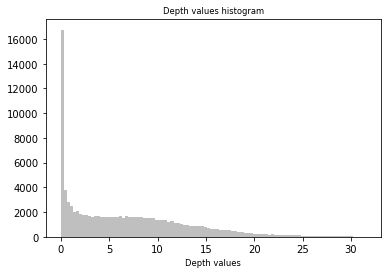

In [5]:
from mindboggle.mio.plots import histograms_of_lists
histograms_of_lists(columns=[depths],
                    column_name='Depth values',
                    ignore_columns=[],
                    nbins=100,
                    axis_limits=[],
                    titles='depth values')

Plot the depth values in 3-D:

In [6]:
from nbpapaya import Overlay
import os

In [7]:
import pandas as pd
df = pd.DataFrame(depths, columns=["depth"])
df.to_csv('depths.csv', index=False)

In [8]:
def getMeshOpts(vtk_file, csv_file, vmin, vmax, threshold):
    cols = pd.read_csv(csv_file).columns.tolist()
    MeshOpts = {}
    MeshOpts[os.path.abspath(vtk_file)] = {  
                      "filename": os.path.abspath(csv_file),
                      "colormin": "#0000FF", 
                      "colormax": "#FF0000",
                      "vmin": vmin,
                      "vmax": vmax,
                      "key": cols[0],
                      "key_options": cols,    
                      "threshold": threshold,
                      "mesh_transparency": 1,
                      "mesh_visible": True,
                      "overlay_transparency": 1
                  }
    return MeshOpts

In [10]:
MeshOpts = getMeshOpts(surface_file, "depths.csv" , 2,10,2)
Overlay(MeshOpts)

doing checks /home/jovyan/.jupyter/custom/
{'/home/jovyan/work/mindboggle/docs/lh.pial.vtk': 'papaya_data/tmp9jalb8a3.vtk'}
/files/papaya_data/tmp9jalb8a3.vtk
{'/home/jovyan/work/mindboggle/docs/lh.pial.vtk': {'key_options': ['depth'], 'colormin': '#0000FF', 'mesh_transparency': 1, 'threshold': 2, 'vmax': 10, 'key': 'depth', 'overlay_transparency': 1, 'vmin': 2, 'filename': '/files/papaya_data/tmpjogjholf.csv', 'mesh_visible': True, 'colormax': '#FF0000'}} {'/files/papaya_data/tmp9jalb8a3.vtk': {'key_options': ['depth'], 'colormin': '#0000FF', 'mesh_transparency': 1, 'threshold': 2, 'vmax': 10, 'key': 'depth', 'overlay_transparency': 1, 'vmin': 2, 'filename': '/files/papaya_data/tmpjogjholf.csv', 'mesh_visible': True, 'colormax': '#FF0000'}}


### Extract folds based on depth and curvature:
Find a depth threshold to extract folds from the surface:

In [ ]:
from mindboggle.features.folds import find_depth_threshold
depth_threshold, bins, bin_edges = find_depth_threshold(depth_file=depth_file,
                                                        min_vertices=10000,
                                                        verbose=True)
depth_threshold

Extract folds with the depth threshold:

In [ ]:
from mindboggle.features.folds import extract_folds
folds, n_folds, folds_file = extract_folds(depth_file=depth_file,
                                           depth_threshold=depth_threshold,
                                           min_fold_size=50,
                                           save_file=True,
                                           output_file='folds.vtk',
                                           background_value=-1,
                                           verbose=True)

Plot the folds in 3-D:

In [ ]:
# ANISHA!
df = pd.DataFrame(folds, columns=["folds"])
df.to_csv('folds.csv', index=False)

In [ ]:
folds_file

In [ ]:
MeshOpts = getMeshOpts(folds_file, "folds.csv" , 1,10,1)
Overlay(MeshOpts)

Remove all but one fold to speed things up:

In [ ]:
from mindboggle.mio.vtks import read_scalars
fold_numbers = [4]
fold, name = read_scalars(folds_file, True, True)
i0 = [i for i,x in enumerate(folds) if x not in fold_numbers]
fold[i0] = -1

Plot the fold in 3-D:

In [ ]:
# ANISHA!
df = pd.DataFrame(fold, columns=["fold"])
df.to_csv('fold.csv', index=False)

In [ ]:
MeshOpts = getMeshOpts(folds_file, "fold.csv" , 1,10,1)
Overlay(MeshOpts)

### Identify sulci in (one of) the folds:
Use the DKT labeling protocol's list of label pairs defining each sulcus:

Load a FreeSurfer .annot file and save as a VTK format file:

In [ ]:
from mindboggle.mio.vtks import freesurfer_annot_to_vtk
labels, label_file = freesurfer_annot_to_vtk(annot_file=subject_path + 'label/lh.aparc.annot',
                                             vtk_file=surface_file,
                                             output_vtk='lh.aparc.annot.vtk',
                                             background_value=-1)

Extract sulci from the one fold:

In [ ]:
from mindboggle.features.sulci import extract_sulci
sulci, n_sulci, sulci_file = extract_sulci(labels_file=label_file,
                                           folds_or_file=fold,
                                           hemi='lh',
                                           min_boundary=10,
                                           sulcus_names=[],
                                           save_file=True,
                                           output_file='sulci_from_fold.vtk',
                                           background_value=-1,
                                           verbose=True)
n_sulci

Write out a separate VTK file for each integer in (the first) scalar list of an input VTK file 
(optionally write the values drawn from a second VTK file):

In [ ]:
from mindboggle.mio.vtks import explode_scalars
label_files = explode_scalars(input_indices_vtk=label_file,
                              input_values_vtk='',
                              output_stem='label',
                              exclude_values=[-1],
                              background_value=-1,
                              output_scalar_name='label',
                              remove_background_faces=True,
                              reindex=True,
                              verbose=True)

In [ ]:
from mindboggle.shapes.surface_shapes import travel_depth
from mindboggle.mio.vtks import read_scalars
import numpy as np
ccode_path = '/opt/mindboggle/vtk_cpp_tools'
command = os.path.join(ccode_path, 'travel_depth', 'TravelDepthMain')
depth_file = travel_depth(command=command,
                          surface_file=label_files[0],
                          verbose=True)
depths, name = read_scalars(depth_file)
[np.float("{0:.{1}f}".format(x, 5)) for x in depths[0:8]]

def freesurfer_curvature_to_vtk(surface_file, vtk_file, output_vtk='',
                                background_value=-1):
    """
    Convert FreeSurfer curvature, thickness, or convexity file to VTK format.

    Parameters
    ----------
    surface_file : string
        name of FreeSurfer surface file
    vtk_file : string
        name of VTK surface file
    output_vtk : string
        name of output VTK file
    background_value : integer or float
        background value

    Returns
    -------
    output_vtk : string
        name of output VTK file, where each vertex is assigned
        the corresponding shape value

    Examples
    --------
from mindboggle.mio.vtks import freesurfer_curvature_to_vtk
from mindboggle.mio.fetch_data import prep_tests
urls, fetch_data = prep_tests()
surface_file = fetch_data(urls['left_freesurfer_thickness'], '', '.vtk')
vtk_file = fetch_data(urls['left_pial'], '', '.vtk')
output_vtk = 'freesurfer_curvature_to_vtk.vtk'
background_value = -1
output_vtk = freesurfer_curvature_to_vtk(surface_file, vtk_file,
    ...                                          output_vtk, background_value)

In [ ]:
from mindboggle.mio.vtks import freesurfer_curvature_to_vtk
output_vtk = freesurfer_curvature_to_vtk(surface_file=surface_vtk_file
                                         vtk_file=surface_vtk_file,
                                         output_vtk='curvature.vtk',
                                         background_value=-1)

<a id="example2"></a>
### Example 2:  Compute statistical measures across vertices per label.

**[stats_per_label](https://github.com/nipy/mindboggle/blob/master/mindboggle/guts/compute.py#L716)** (values, labels, include_labels=[], exclude_labels=[], weights=[], precision=1)

    When computing statistical measures across vertices per label, 
    you can optionally use weights (such as surface area per vertex),
    to compute, for example, a surface area-weighted mean:

    average value = sum(a_i * v_i) / total_surface_area,
    where *a_i* and *v_i* are the area and value for each vertex *i*.

    Reference:
        Weighted skewness and kurtosis unbiased by sample size
        Lorenzo Rimoldini, arXiv:1304.6564 (2013)
        http://arxiv.org/abs/1304.6564

    Parameters
    ----------
    values : numpy array of individual or lists of integers or floats
        values for all vertices
    labels : list or array of integers
        label for each value
    include_labels : list of integers
        labels to include
    exclude_labels : list of integers
        labels to be excluded
    weights : numpy array of floats
        weights to compute weighted statistical measures
    precision : integer
        number of decimal places to consider weights

    Returns
    -------
    medians : list of floats
        median for each label
    mads : list of floats
        median absolute deviation for each label
    means : list of floats
        mean for each label
    sdevs : list of floats
        standard deviation for each label
    skews : list of floats
        skew for each label
    kurts : list of floats
        kurtosis value for each label
    lower_quarts : list of floats
        lower quartile for each label
    upper_quarts : list of floats
        upper quartile for each label
    label_list : list of integers
        list of unique labels

In [ ]:
import numpy as np
from mindboggle.mio.vtks import read_scalars
from mindboggle.guts.compute import stats_per_label
from mindboggle.mio.fetch_data import prep_tests
urls, fetch_data = prep_tests()
values_file = fetch_data(urls['left_mean_curvature'], '', '.vtk')
labels_file = fetch_data(urls['left_freesurfer_labels'], '', '.vtk')
area_file = fetch_data(urls['left_area'], '', '.vtk')
values, name = read_scalars(values_file, True, True)
areas, name = read_scalars(area_file, True, True)
labels, name = read_scalars(labels_file)
include_labels = []
exclude_labels = [-1]
weights = areas
precision = 1
medians, mads, means, sdevs, skews, kurts, lower_quarts, upper_quarts, label_list = stats_per_label(values, 
    labels, include_labels, exclude_labels, weights, precision)
medians

View histograms of statistical values:

In [ ]:
from mindboggle.mio.plots import histograms_of_lists
columns = [medians, mads, skews, kurts, lower_quarts, upper_quarts]
column_name = '.'
ignore_columns = []
nbins = 10
axis_limits = []
titles = ['medians', 'mads', 'skews', 'kurts', 'lower_quarts', 'upper_quarts']
histograms_of_lists(columns, column_name, ignore_columns, nbins, axis_limits, titles)

<a id="example3"></a>
### Example 3:  Decimate a left postcentral pial surface.

**[stats_per_label](https://github.com/nipy/mindboggle/blob/master/mindboggle/guts/mesh.py#L750)** (points, faces, reduction=0.75, smooth_steps=25, scalars=[], save_vtk=False, output_vtk='')

    Decimate vtk triangular mesh with vtk.vtkDecimatePro.

    Parameters
    ----------
    points : list of lists of floats
        each element is a list of 3-D coordinates of a vertex on a surface mesh
    faces : list of lists of integers
        each element is list of 3 indices of vertices that form a face
        on a surface mesh
    reduction : float
        fraction of mesh faces to remove
    smooth_steps : integer
        number of smoothing steps
    scalars : list of integers or floats
        optional scalars for output VTK file
    save_vtk : bool
        output decimated vtk file?
    output_vtk : string
        output decimated vtk file name

    Returns
    -------
    points : list of lists of floats
        decimated points
    faces : list of lists of integers
        decimated faces
    scalars : list of integers or floats
        scalars for output VTK file
    output_vtk : string
        output decimated vtk file

In [ ]:
from mindboggle.guts.mesh import decimate
from mindboggle.mio.vtks import read_vtk
from mindboggle.mio.fetch_data import prep_tests
urls, fetch_data = prep_tests()
input_vtk = fetch_data(urls['left_freesurfer_labels'], '', '.vtk')
points, f1, f2, faces, scalars, f3, f4, f5 = read_vtk(input_vtk)
reduction = 0.5
smooth_steps = 25
save_vtk = True
output_vtk = 'decimate.vtk'
points2, faces2, scalars, output_vtk = decimate(points, faces, reduction, smooth_steps, scalars, save_vtk, output_vtk)
(len(points), len(points2))
(len(faces), len(faces2))

View the decimated surface:

In [ ]:
from mindboggle.mio.plots import plot_surfaces
plot_surfaces('decimate.vtk')

<a id="example4"></a>
### Example 4:  Relabel a VTK surface.

**[relabel_surface](https://github.com/nipy/mindboggle/blob/master/mindboggle/guts/relabel.py#L300)** (vtk_file, hemi='', old_labels=[], new_labels=[], erase_remaining=True, erase_labels=[], erase_value=-1, output_file='')

    Parameters
    ----------
    vtk_file : string
         input labeled VTK file
    hemi : string
        hemisphere ('lh' or 'rh' or '')
        if set, add 1000 to left and 2000 to right hemisphere labels;
    old_labels : list of integers
        old labels (empty list if labels drawn from vtk scalars);
        may be used in conjunction with hemi
    new_labels : list of integers
        new labels (empty list if labels drawn from vtk scalars);
        may be used in conjunction with hemi
    erase_remaining : bool
        set all values not in old_labels to erase_value?
    erase_labels : list of integers
        values to erase (set to erase_value)
    erase_value : integer
        set vertices with labels in erase_labels to this value
    output_file : string
        new vtk file name

    Returns
    -------
    output_file : string
        new vtk file name

In [ ]:
import numpy as np
from mindboggle.guts.relabel import relabel_surface
from mindboggle.mio.vtks import read_scalars
from mindboggle.mio.fetch_data import prep_tests
urls, fetch_data = prep_tests()
vtk_file = fetch_data(urls['left_freesurfer_labels'], '', '.vtk')
hemi = 'lh'
old_labels = [1003,1009,1030]
new_labels = [0,500,1000]
erase_remaining = True
erase_labels = [0]
erase_value = -1
output_file = 'relabel_surface.vtk'
output_file = relabel_surface(vtk_file, hemi, old_labels, new_labels,
    erase_remaining, erase_labels, erase_value, output_file)
labels, name = read_scalars(output_file, True, True)
np.unique(labels)

View relabeled surface file:

In [ ]:
from mindboggle.mio.plots import plot_surfaces
plot_surfaces(output_file)

<a id="example5"></a>
### Example 5:  Segment deep vertices of surface into contiguous regions.

**[segment_regions](https://github.com/nipy/mindboggle/blob/master/mindboggle/guts/segment.py#L181)** (vertices_to_segment, neighbor_lists, min_region_size=1, seed_lists=[], keep_seeding=False, spread_within_labels=False, labels=[], label_lists=[], values=[], max_steps='', background_value=-1, verbose=False)

    Parameters
    ----------
    vertices_to_segment : list of integers
        indices to mesh vertices to be segmented
    neighbor_lists : list of lists of integers
        each list contains indices to neighboring vertices for each vertex
    min_region_size : integer
        minimum size of segmented set of vertices
    seed_lists : list of lists, or empty list
        each list contains indices to seed vertices to segment vertices_to_segment
    keep_seeding : bool
        grow from new seeds even after all seed lists have fully grown
    spread_within_labels : bool
        grow seeds only by vertices with labels in the seed labels?
    labels : list of integers (required only if spread_within_labels)
        label numbers for all vertices
    label_lists : list of lists of integers (required only if spread_within_labels)
        List of unique labels for each seed list to grow into
        (If empty, set to unique labels for each seed list)
    values : list of floats (default empty)
        values for all vertices for use in preferentially directed segmentation
        (segment in direction of lower values)
    max_steps : integer (or empty string for infinity)
        maximum number of segmentation steps to take for each seed list
    background_value : integer or float
        background value
    verbose : bool
        print statements?

    Returns
    -------
    segments : numpy array of integers
        region numbers for all vertices

In [ ]:
# Example without seed lists:
import numpy as np
from mindboggle.guts.segment import segment_regions
from mindboggle.mio.vtks import read_vtk
from mindboggle.guts.mesh import find_neighbors
from mindboggle.mio.fetch_data import prep_tests
background_value = -1
urls, fetch_data = prep_tests()
depth_file = fetch_data(urls['left_travel_depth'], '', '.vtk')
f1,f2,f3, faces, depths, f4, npoints, t5 = read_vtk(depth_file, True, True)
vertices_to_segment = np.where(depths > 0.50)[0].tolist()  # (sped up)
neighbor_lists = find_neighbors(faces, npoints)
segments = segment_regions(vertices_to_segment, neighbor_lists)
len_segments = [len(np.where(segments == x)[0]) 
                for x in np.unique(segments) 
                if x != background_value]
len_segments[0:10]

Write results to vtk file and view:

In [ ]:
from mindboggle.mio.plots import plot_surfaces
from mindboggle.mio.vtks import rewrite_scalars
rewrite_scalars(depth_file, 'segment_regions_no_seeds.vtk', segments, 'segments', [], -1)
plot_surfaces('segment_regions_no_seeds.vtk')

<a id="example6"></a>
### Example 6:  Extract sulcus label borders.

**[extract_borders](https://github.com/nipy/mindboggle/blob/master/mindboggle/guts/segment.py#L1445)** 
                    (indices, labels, neighbor_lists,
                    ignore_values=[], return_label_pairs=False)

    Label borders are the set of all vertices
    whose neighbors do not share the same label.

    Parameters
    ----------
    indices : list of integers
        indices to (a subset of) vertices
    labels : numpy array of integers
        label numbers for all vertices
    neighbor_lists : list of lists of integers
        each list contains indices to neighboring vertices for each vertex
    ignore_values : list of integers
        integers to ignore (e.g., background)
    return_label_pairs : bool
        return label pairs?

    Returns
    -------
    border_indices : list of integers
        indices to label boundary vertices
    border_label_tuples : list of lists of sorted pairs of integers
        sorted label pairs
    unique_border_label_tuples : list of sorted pairs of integers
        unique, sorted label pairs

In [ ]:
from mindboggle.guts.segment import extract_borders
import numpy as np
from mindboggle.guts.mesh import find_neighbors
from mindboggle.guts.segment import extract_borders
from mindboggle.mio.vtks import read_vtk
from mindboggle.mio.fetch_data import prep_tests
urls, fetch_data = prep_tests()
label_file = fetch_data(urls['left_freesurfer_labels'], '', '.vtk')
f1,f2,f3, faces, labels, f4, npoints, f5 = read_vtk(label_file, True, True)
neighbor_lists = find_neighbors(faces, npoints)
ignore_values = []
return_label_pairs = True
indices_borders, label_pairs, f1 = extract_borders(list(range(npoints)), labels, neighbor_lists, ignore_values, return_label_pairs)
indices_borders[0:10]
label_pairs[0:5]

Write borders on surfaces to vtk file and view:

In [ ]:
from mindboggle.mio.plots import plot_surfaces
from mindboggle.mio.vtks import rewrite_scalars
IDs = -1 * np.ones(npoints)
IDs[indices_borders] = 1
rewrite_scalars(label_file, 'extract_borders.vtk', IDs, 'borders')
plot_surfaces('extract_borders.vtk')

Write just the borders to vtk file and view:

In [ ]:
rewrite_scalars(label_file, 'extract_borders_no_background.vtk', IDs, 'borders', IDs)
plot_surfaces('extract_borders_no_background.vtk')